In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def breakdown_forecast_error(forecast_dataframe):
    
    cacheForecastDayError = {

        'forecastday':[],
        'forecasterror':[],
    }

    for l in forecast_dataframe['forecastday'].unique():
        cacheForecastDayError['forecastday'].append(l)
        cacheForecastDayError['forecasterror'].append((forecast_dataframe[forecast_dataframe['forecastday'] == l]['pointForecast']\
                                                     - forecast_dataframe[forecast_dataframe['forecastday'] == l]['close']).mean())

    return pd.DataFrame(cacheForecastDayError).set_index('forecastday')

In [3]:
forecast_dataframe = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(1,0)\forecasts_corn_(1, 0)_True_5.csv')

In [4]:
forecast_error = breakdown_forecast_error(forecast_dataframe)
forecast_error.head()

,forecasterror
forecastday,
1,0.153158
2,0.096123
3,-0.053591
4,-0.098091
5,-0.114828


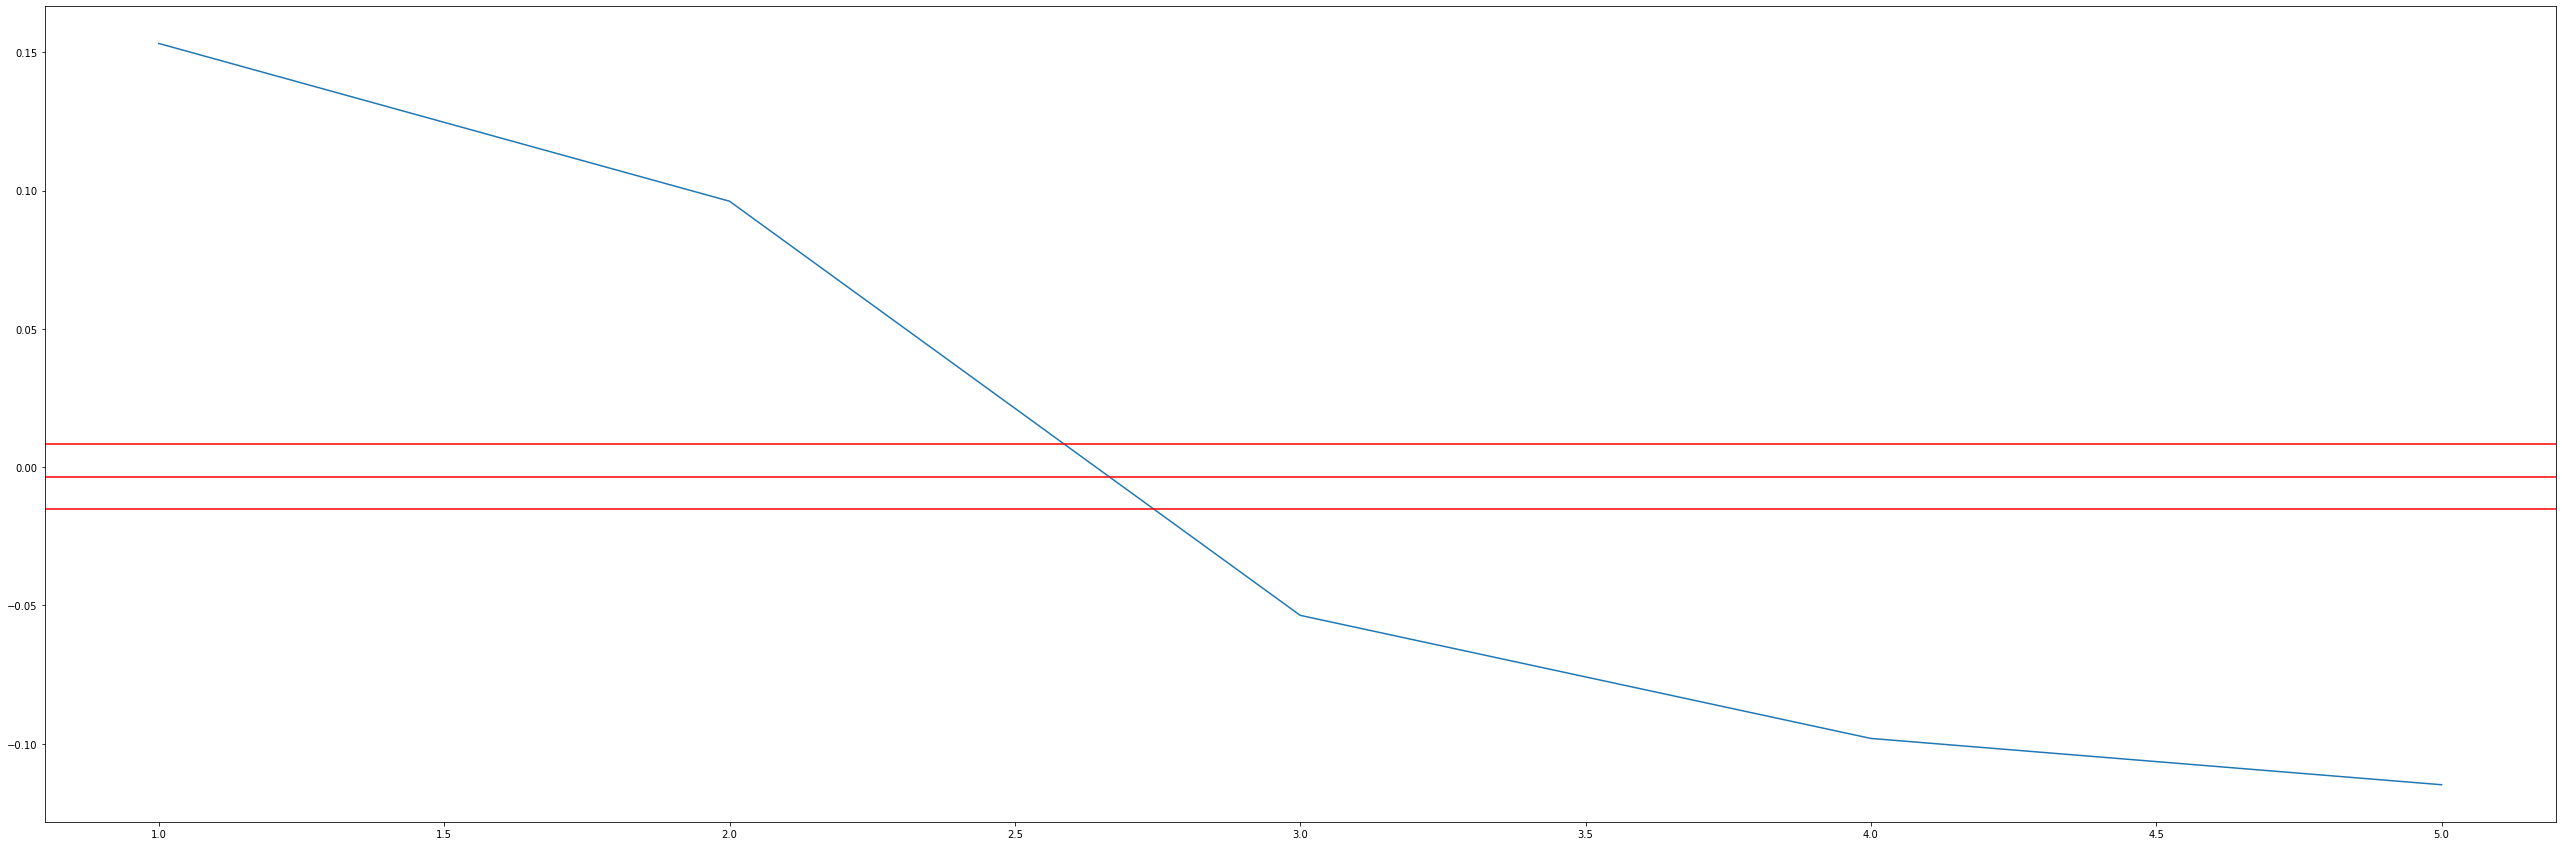

In [5]:
plt.figure(figsize=(45,15))

plt.plot(forecast_error['forecasterror'])

plt.axhline(np.mean(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])+np.var(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])-np.var(forecast_error['forecasterror']),color = 'red')

plt.show()